### Visual and check icesat2 data on the study region.

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import warnings
warnings.filterwarnings('ignore')


In [2]:
path_hma_vec = 'data/boundary/hma_bolch2019.gpkg'
path_setp_vec = 'data/boundary/setp_zhao2022.gpkg'
path_atl06_raw = 'data/icesat-2/ATL06-2018/data-raw/processed_ATL06_20181014210104_02480106_005_01.h5'
path_atl06_readout = 'data/icesat-2/ATL06-2018/data-readout/processed_ATL06_20181014210104_02480106_005_01_readout_subs.h5'
path_atl06_tile = 'data/icesat-2/ATL06-2018/data-tiles/tile_30_95.h5'



### Read 1 icesat-2 ATL06 data

In [3]:
# !h5ls $path_atl06_raw/gt2l/land_ice_segments
# !h5ls $path_atl06_readout
!h5ls $path_atl06_tile


beam_type                Dataset {108355}
cycle                    Dataset {108355}
h                        Dataset {108355}
lat                      Dataset {108355}
lon                      Dataset {108355}
orbit_type               Dataset {108355}
rgt                      Dataset {108355}
spot                     Dataset {108355}
t_dyr                    Dataset {108355}


In [4]:
atl06_readout = h5py.File(path_atl06_readout,'r')
atl06_tile = h5py.File(path_atl06_tile,'r')



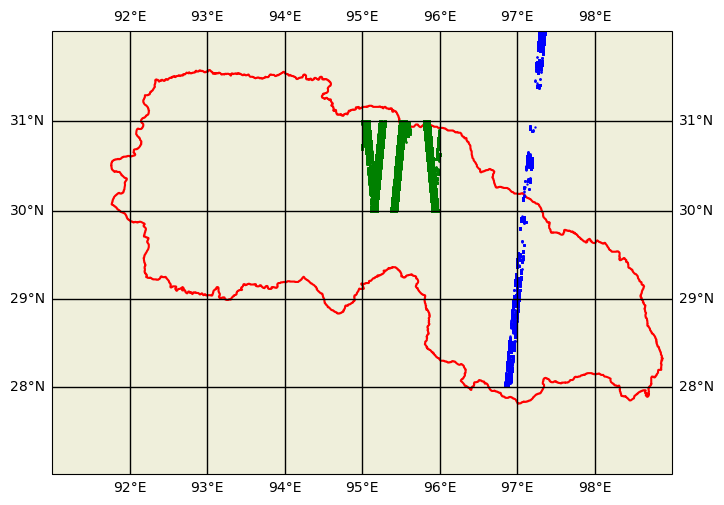

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([91, 99, 27.0, 32.0])
ax.add_feature(cfeature.LAND)
ax.gridlines(draw_labels=True, linewidth=1, alpha=1, zorder=1, color='black')
## 1. setp boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                          crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
## 2. icesat-2 readout data
ax.scatter(x=atl06_readout['lon'][:], y=atl06_readout['lat'][:], c='blue', s=0.5, transform=ccrs.PlateCarree(), zorder=0)

## 3. icesat-2 tile-based data
ax.scatter(x=atl06_tile['lon'][:], y=atl06_tile['lat'][:], c='green', \
                                            s=0.5, transform=ccrs.PlateCarree(), zorder=0)

